# 导入必要的库

我们需要导入一个叫 [captcha](https://github.com/lepture/captcha/) 的库来生成验证码。

我们生成验证码的字符由数字和大写字母组成。

In [69]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


# 定义数据生成器

In [70]:
from keras.utils.np_utils import to_categorical

def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

# 测试生成器

Text(0.5,1,'9QCZ')

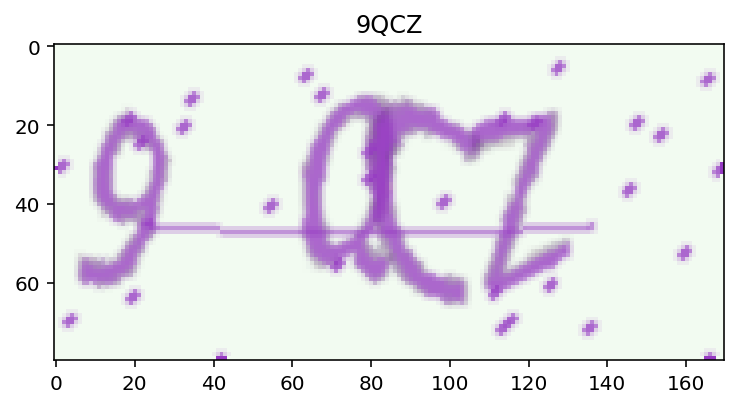

In [71]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))

# 定义网络结构

In [72]:
from keras.models import *
from keras.layers import *

input_tensor = Input((height, width, 3))
x = input_tensor
for i in range(4):
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
model = Model(input=input_tensor, output=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras

# 网络结构可视化

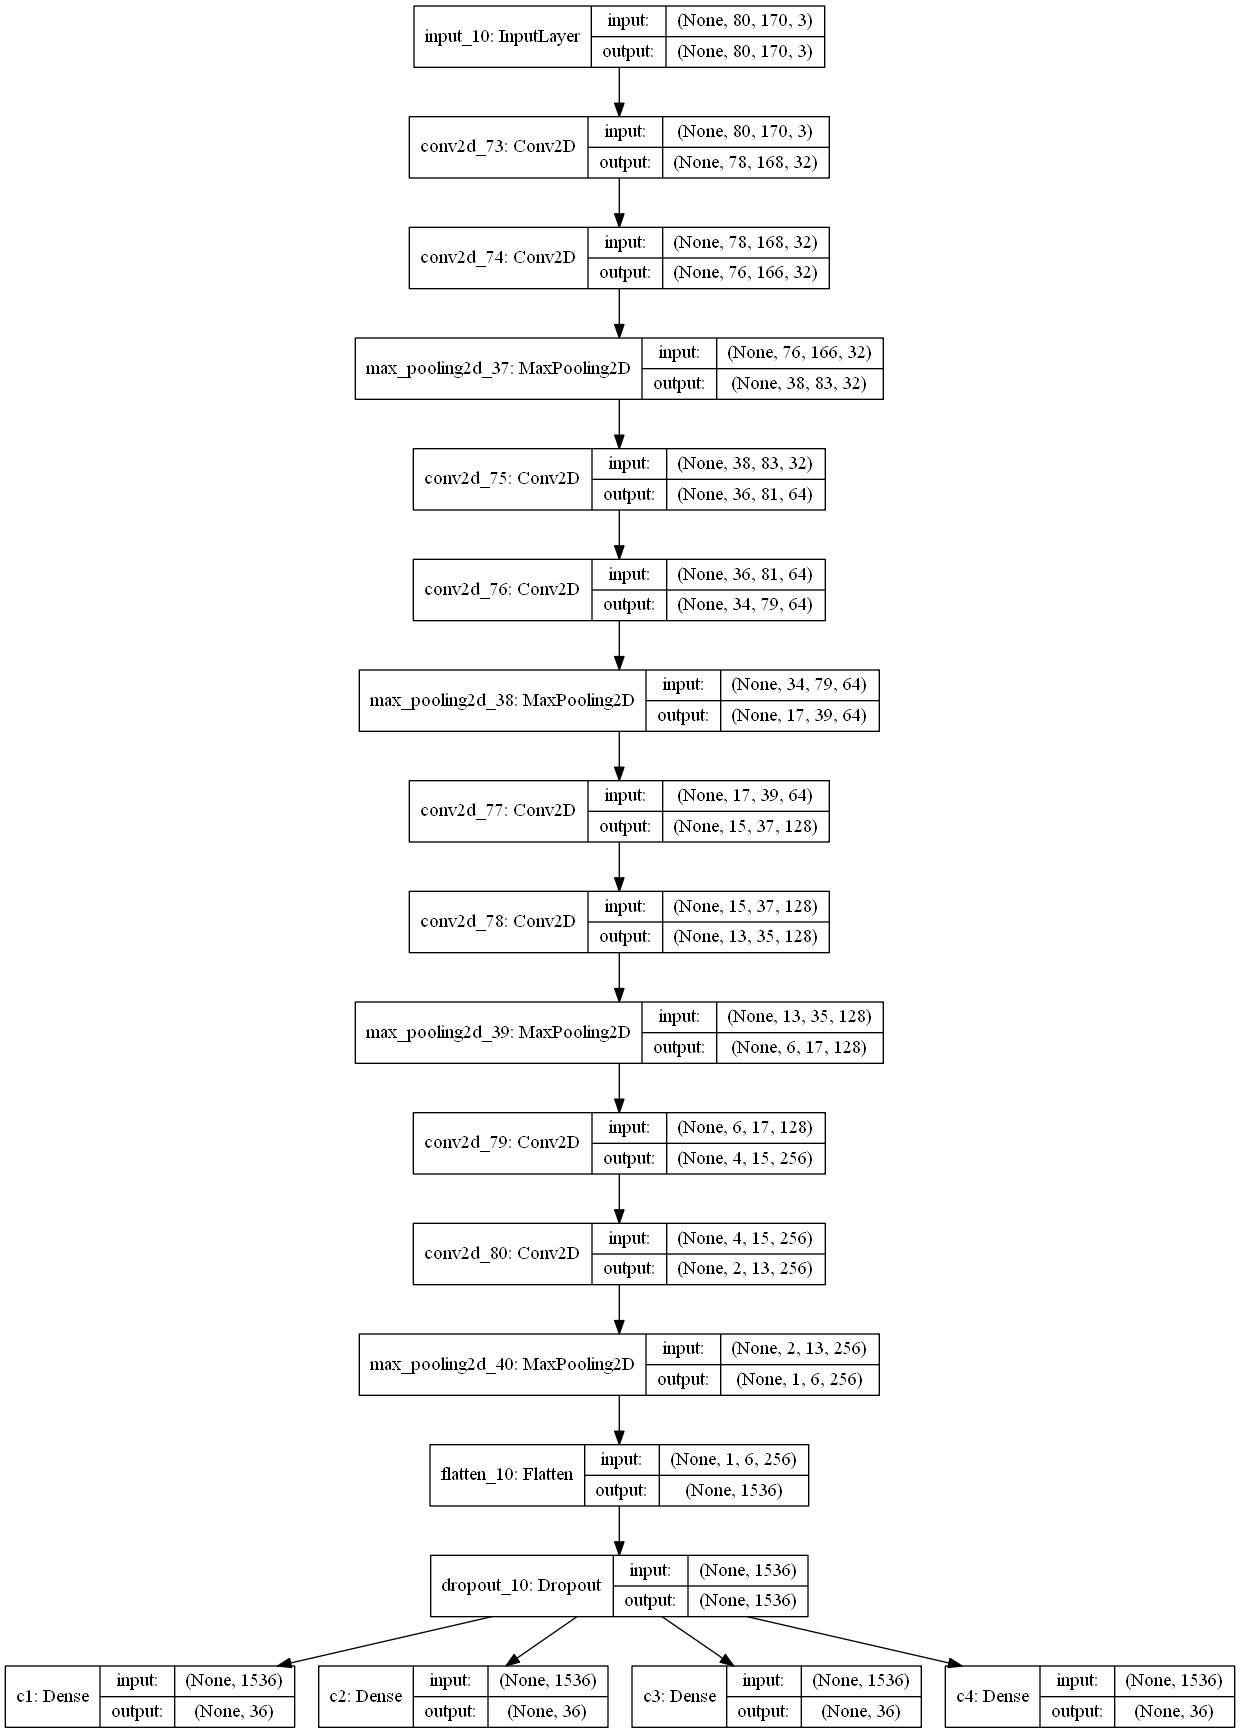

In [73]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="model.png", show_shapes=True)
Image('model.png')

# 训练模型

In [74]:
model.fit_generator(gen(512), steps_per_epoch=1, nb_epoch=50,
                    validation_data=gen(128), validation_steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=1, validation_data=<generator..., validation_steps=10, epochs=50)`
  


Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 53.7564 - c1_loss: 13.5325 - c2_loss: 14.7187 - c3_loss: 12.4601 - c4_loss: 13.0451 - c1_acc: 0.0254 - c2_acc: 0.0332 - c3_acc: 0.0391 - c4_acc: 0.0449 - val_loss: 44.4484 - val_c1_loss: 12.4662 - val_c2_loss: 11.7221 - val_c3_loss: 9.6633 - val_c4_loss: 10.5967 - val_c1_acc: 0.0336 - val_c2_acc: 0.0258 - val_c3_acc: 0.0320 - val_c4_acc: 0.0242
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 47.6152 - c1_loss: 12.8569 - c2_loss: 12.3404 - c3_loss: 10.5438 - c4_loss: 11.8741 - c1_acc: 0.0391 - c2_acc: 0.0332 - c3_acc: 0.0312 - c4_acc: 0.0156 - val_loss: 16.4260 - val_c1_loss: 4.1994 - val_c2_loss: 4.0392 - val_c3_loss: 4.1318 - val_c4_loss: 4.0556 - val_c1_acc: 0.0266 - val_c2_acc: 0.0281 - val_c3_acc: 0.0266 - val_c4_acc: 0.0219
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 16.7255 - c1_loss: 4.3059 - c2_loss: 4.0626 - c3_loss: 4.2844 - c4_loss: 4.0726 - c1_acc: 0.0312 - c

Epoch 21/50
1/1 [==============================] - 5s 5s/step - loss: 14.3411 - c1_loss: 3.5856 - c2_loss: 3.5799 - c3_loss: 3.5902 - c4_loss: 3.5853 - c1_acc: 0.0234 - c2_acc: 0.0312 - c3_acc: 0.0254 - c4_acc: 0.0234 - val_loss: 14.3402 - val_c1_loss: 3.5848 - val_c2_loss: 3.5853 - val_c3_loss: 3.5822 - val_c4_loss: 3.5879 - val_c1_acc: 0.0273 - val_c2_acc: 0.0352 - val_c3_acc: 0.0344 - val_c4_acc: 0.0258
Epoch 22/50
1/1 [==============================] - 5s 5s/step - loss: 14.3354 - c1_loss: 3.5860 - c2_loss: 3.5850 - c3_loss: 3.5832 - c4_loss: 3.5812 - c1_acc: 0.0195 - c2_acc: 0.0215 - c3_acc: 0.0410 - c4_acc: 0.0293 - val_loss: 14.3354 - val_c1_loss: 3.5831 - val_c2_loss: 3.5847 - val_c3_loss: 3.5830 - val_c4_loss: 3.5846 - val_c1_acc: 0.0336 - val_c2_acc: 0.0352 - val_c3_acc: 0.0250 - val_c4_acc: 0.0266
Epoch 23/50
1/1 [==============================] - 5s 5s/step - loss: 14.3377 - c1_loss: 3.5819 - c2_loss: 3.5842 - c3_loss: 3.5850 - c4_loss: 3.5865 - c1_acc: 0.0312 - c2_acc: 0.0

KeyboardInterrupt: 

# 测试模型

In [ ]:
X, y = next(gen(1))
y_pred = model.predict(X)
plt.title('real: %s\npred:%s'%(decode(y), decode(y_pred)))
plt.imshow(X[0], cmap='gray')
plt.axis('off')

# 计算模型总体准确率

In [ ]:
from tqdm import tqdm
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen()
    for i in tqdm(range(batch_num)):
        X, y = next(generator)
        y_pred = model.predict(X)
        batch_acc += np.mean(list(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T)))
    return batch_acc / batch_num

evaluate(model)

# 保存模型

In [ ]:
model.save('cnn.h5')